## De vrais réseaux de neurones

Nous avons vu comment on préparait la donnée pour la mettre en entrée d'un réseau de neurones. Dans ce calepin, nous voyons par quels mécanismes un réseau de neurones peut parvenir à effectuer une tâche. \
Pour bien comprendre, nous n'allons pas chercher à classer des images ou à traiter du texte : nous allons simplement chercher à classer des paires de réels.

Mais avant, nous avons besoin de quelques imports :

In [18]:
# Pour tracer des courbes
from matplotlib import pyplot as plt
from matplotlib.pyplot import scatter as trace_point
# Pour manipuler des tables
import numpy as np
# package pour le TD
! git clone https://github.com/nanopiero/intro-ia-secondes.git

import sys
sys.path.append('intro-ia-secondes/utiles')
from utile import *


## Exercice n°1 : classification binaire, cas simple

In [44]:
def preleve_element():
  label = torch.randint(0,2, (1,))
  x = 2*label - 1
  moyenne = torch.tensor((x, x))
  point = moyenne + 0.65 * torch.randn(2)
  return point.numpy(), label.item()

def preleve_element2():
  label = torch.randint(0,2, (1,))
  std = 0.45

  if label == 0 :
    rand2 = 2 * torch.randint(0,2, (1,)) - 1
    moyenne = torch.tensor((rand2, rand2))
    point = moyenne + std * torch.randn(2)
  else :
    x = 2*label - 1
    rand2 = 2 * torch.randint(0,2, (1,)) - 1
    moyenne = torch.tensor((rand2, -1 * rand2))
    point = moyenne + std * torch.randn(2)

  return point.numpy(), label.item()

In [ ]:
# De cette manière on prélève un point dans le jeu de données :
point, label = preleve_element()

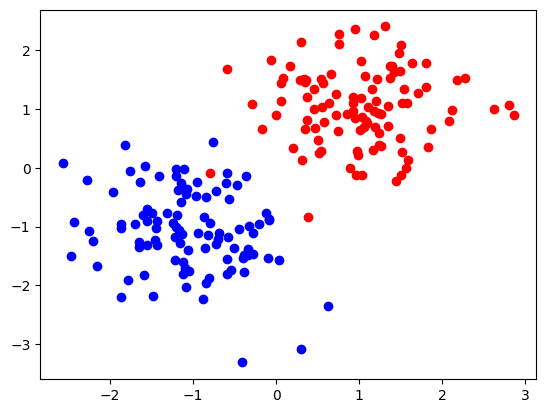

In [54]:
# De cette manière on forme une liste de cent points :
colors = ['blue', 'red']


# rouge : classe 1 bleu : classe 0

for i in range(200):
  point, label = preleve_element()
  trace_point(point[0], point[1], color=colors[label])

**Question n°1** Une fonction affine définie sur $\mathcal{R}^2$, c'est une fonction de la forme :
$$ f(x, y) = a . x + b . y + c $$

Coder la fonction *F(x,y)* pour laquelle $a = 1$, $b = 1$ et $c = 0.5$.



In [39]:
def F(x,y):

  return ...

**Question n°2** : Quelle est l'image par *F* de (0,0) ? De (1,4) ? De (-1,-1) ? \
*F* permet-elle d'atteindre la cible souvent ?

On se rappelle qu'un neurone, c'est une combinaison d'une fonction affine et d'une fonction non linéaire très simple.
Prenons par exemple : \
$$ H: z \rightarrow 0 \text{  si  } z < 0 \text{ ; }1 \text{ sinon} $$.

**Question n°3** : Quelle est sa courbe représentative ? Pourquoi cette fonction n'est-elle pas une fonction affine ?


**Question n°4** : Coder la fonction *H* avec un test logique ("*if then else*"):

In [ ]:
def H(z):

  ...

  return ...

In [ ]:
# Notre premier neurone :
def neurone1(x,y):
  z = F1(x,y)
  sortie = H(z)
  return sortie

**Question n°3** : Quelles sont les sorties associées aux entrées (0,0), (1,4) et (-1,-1) ?

**Question n°4** : Quel est l'ensemble des entrées pour lesquelles la valeur est 1 ? Pouvez-vous vous le représenter dans le plan ?

**Question n°5** : Maintenant, le plus dur : pouvez-vous changer les poids de $F$ pour que la sortie de $neurone1$ soit le plus souvent égale au label ciblé ?   

## **Exercice n°2** : pourquoi assembler plusieurs neurones ?

**Question n°1** : Pouvez-vous placer 200 points tirés au hasard du deuxième jeu de données en utilisant la commande *preleve_element2()* ?  

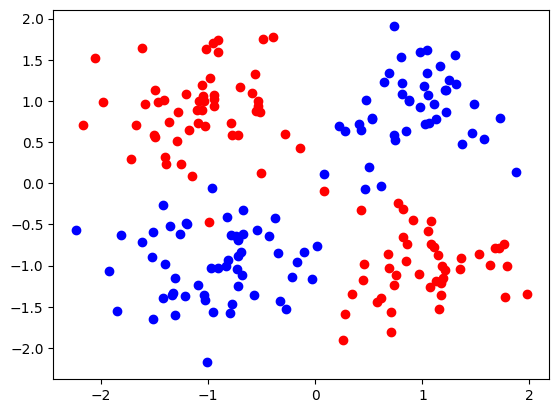

In [50]:
for i in range(200):
  point, label = preleve_element2()
  trace_point(point[0], point[1], color=colors[label])

**Question n°2** : Pour quelle raison un neurone simple comme *neruone1* ne suffirait pas ?

**Question n°3** : pouvez construire un réseau de neurones $z = reseau(x,y)$ tel que:
- dans ce réseau, tous les neurones sont identiques à $neurone1$, excepté les poids des fonctions affines.
- un neurone $i$ prend en entrée soit l'entrée du réseau $(x,y)$, soit $(z_j, z_k)$ où $z_j$ est la sortie neurone $j$ et $z_k$ est la sortie $z_k$ du neurone $k$.

Tester votre code à l'aide d'une boucle *for*.

**Bilan**
* Les neurones les plus simples sont des combinaisons de fonctions affines et de fonctions non-linéaires très simples.
* Dans le cas d'une classification binaire (classes '0' et '1') de couples de réels, la frontière de décision entre la classe '0' et la classe '1' est une droite.
* Lorsque l'on ne peut pas résoudre le problème avec une frontière droite, on peut encore y arriver en combianant des neurones, mais ça se complique vite.
* Le **deep learning**, ce sont des algorithmes qui permettent de **choisir automatiquement** les poids des neurones d'un très gros réseau de neurones.   